> GODE에서 사용된 Graph signal 예제들에 대한 설명

# Import

In [1]:
import pickle

# Esmaple 1. Simple Linear

**Data Information**

- $V=\{{\boldsymbol v}_1,\dots,{\boldsymbol v}_n\}:=\{(x_1,y_2,z_3),\dots,(x_n,y_n,z_n)\}$
    - $r_i= 5 + \cos(\frac{12\pi (i - 1)}{n - 1})$, $\theta_i= -\pi + \frac{{\pi(n-2)(i - 1)}}{n(n - 1)}$
    - $x_i = r_i \cos(\theta_i)$, $y_i = r_i \sin(\theta_i)$, $z_i = 10 \cdot \sin(\frac{{6\pi \cdot (i - 1)}}{{n - 1}})$.
- $W_{i,j} = \begin{cases} \exp\left(-\frac{\|{\boldsymbol v}_i -{\boldsymbol v}_j\|^2}{2\theta^2}\right) & \|{\boldsymbol v}_i -{\boldsymbol v}_j\|^2 \le \kappa \\ 0 & o.w\end{cases}$

> Note that ${\bf L}$ is GSO, and in this case, GFT is just Discrete Fourier Transform also note that ${\cal G}_W$ is a regular graph since ${\bf D}={\bf I}$. Thus this data is Euclidean data. 

**graph signal**

**$y:V \to \mathbb{R}$**

- $y_i=\frac{10}{n}v_i+\eta_i+\epsilon_i$ 
- $\epsilon_i \sim N(\mu,\sigma^2)$
- $\eta_i \sim U^\star$ with sparsity $0.05$ where $U^\star$ is mixture of $U(1.5,2)$ and $U(-2,-1.5)$. 

> Note that ${\bf y}$ is weakly stationary ***w.r.t.*** ${\bf L}$.

**Euclidean Data**

- domain 이 $x$축(실수 $\mathbb{R}$로 정의되는)인 유클리디안 데이터
- underline이 선, 아래에서는 $y=5x$가 되겠다.
    - 1d-grid로 볼 수 있음.([non-euclidean vs euclidean 참고](https://seoyeonc.github.io/sy_hub/posts/2_Studies/GRAPH/2023-07-01-Euclidean_nonEuclidean.html))
- underliying function이 regular graph로 정의([regular graph 참고](https://seoyeonc.github.io/sy_hub/posts/2_Studies/GRAPH/2023-06-30-Regular%20Graph.html))

![Figure: First example of GODE](Figs/GODE_fig1.png){width=80%}

# Esmaple 2. Orbit

**Data Information**

**${\cal G}_W=(V,E,{\bf W})$**

- $V=\{{\boldsymbol v}_1,\dots,{\boldsymbol v}_n\}:=\{(x_1,y_2,z_3),\dots,(x_n,y_n,z_n)\}$
    - $r_i= 5 + \cos(\frac{12\pi (i - 1)}{n - 1})$, $\theta_i= -\pi + \frac{{\pi(n-2)(i - 1)}}{n(n - 1)}$
    - $x_i = r_i \cos(\theta_i)$, $y_i = r_i \sin(\theta_i)$, $z_i = 10 \cdot \sin(\frac{{6\pi \cdot (i - 1)}}{{n - 1}})$.
- $W_{i,j} = \begin{cases} \exp\left(-\frac{\|{\boldsymbol v}_i -{\boldsymbol v}_j\|^2}{2\theta^2}\right) & \|{\boldsymbol v}_i -{\boldsymbol v}_j\|^2 \le \kappa \\ 0 & o.w\end{cases}$

**Non-Euclidean Data**

- 2D shape이다.
- domain이 곡선인 논유클리디안 데이터
- underlying function이 regular graph로 정의되지 않는다.([regular graph 참고](https://seoyeonc.github.io/sy_hub/posts/2_Studies/GRAPH/2023-06-30-Regular%20Graph.html))
- 거리 계산을 유클리드 거리로 할 때, underline이 곡선이라 합리적이지 않다.
- weight은 유클리디안 거리로 정의되어 있지만, $\kappa$로 hyperparameter 지정해주어 거리가 짧으면 유클리디안 거리로 정의하고, 멀면 0으로 연결을 끊는 행렬으로 정의.

::: {.callout-note}
**유클리디안으로 보고 싶다면??**

- 모든 연결 weight를 끊어버리면 된다.
- 그러면 regular graph 로 정의 가능.
- 하지만, d연구의 목적에 어긋남.
:::

> Note that ${\bf W}$ is GSO, since ${\bf W}^\top = {\bf W}$. In this cases, ${\cal G}_W$ is not regular since there does not exist $k$ such that ${\bf D}=k{\bf I}$.

**graph signal**
**${\bf y}:V \to \mathbb{R}^3$**

- ${\bf y}_i={\boldsymbol v}_i+{\boldsymbol \eta}_i+{\boldsymbol \epsilon}_i$ 
- ${\boldsymbol \epsilon}_i \sim N({\boldsymbol \mu},\sigma^2{\bf I})$
- ${\boldsymbol \eta}_i \sim U^\star$ with sparsity $0.05$ where $U^\star$ is mixture of $U(5,7)$ and $U(-7,-5)$. 

> Clearly ${\bf y}$ is stationary **w.r.t.** ${\bf W}$ or ${\bf L}$.

![Figure: Second example of GODE](Figs/GODE_fig2.png){width=80%}

# Esmaple 3. Stanford Bunny

**Data Information**

**pygsp** 라이브러리를 사용하여 데이터 가져옴, weight도!(mesh 로 색의 퍼짐 정도로 나타낸 것으로 간단 이해)

**Non-Euclidean Data**

- 3D shape
- domain이 곡면이고, underline이 곡면인 넌유클리디안 데이터
- underlying function 이 색
    - 아래를 설명해보자면, 연한 파란-연한 초록 점이 언더라인 펑션으로 형성되어 있을때, 진한 색의 점들이 noise로 형성되어 있음.
- underline이 곡면이라 유클리디안 거리를 사용하는 것이 합리적이지 않다.

![Figure: Third example of GODE](Figs/GODE_fig3.png){width=80%}

# Real data. Earthquake

**Data Information**

This data is actual data collected from USGS^[https://www.usgs.gov/programs/earthquake-hazards/lists-maps-and-statistics] during the period from 2010 to 2014.

***${\cal G}=(V,E)$***

- $V=\{{\boldsymbol v}_1,\dots,{\boldsymbol v}_n\}$ where ${\boldsymbol v}:=({\tt Latitude},{\tt Longitude})$
- $W_{i,j} = \begin{cases} \exp(-\frac{\rho(i,j)}{2\theta^2}) & if \rho(i,j) \le \kappa \\ 0 & o.w. \end{cases}$ 
    - Here, $\rho(i,j)=hs({\boldsymbol v}_i, {\boldsymbol v}_j)$ is Haversine distance between ${\boldsymbol v}_i, {\boldsymbol v}_j$. 

- $y_i$ = magnitude


**Non-Euclidean Data**

- domain이 곡면이고, underline이 곡면인 넌유클리디안 데이터
- underlying function 이 magnitude(지진 강도)
- [haversine](https://en.wikipedia.org/wiki/Haversine_formula) 이용하면 곡면 거리가 이미 포함되어 있지만, 자료가 너무 많아 거리가 먼 연결을 끊어주는 역할로 hyperparameter인 $\kappa$사용하였다.

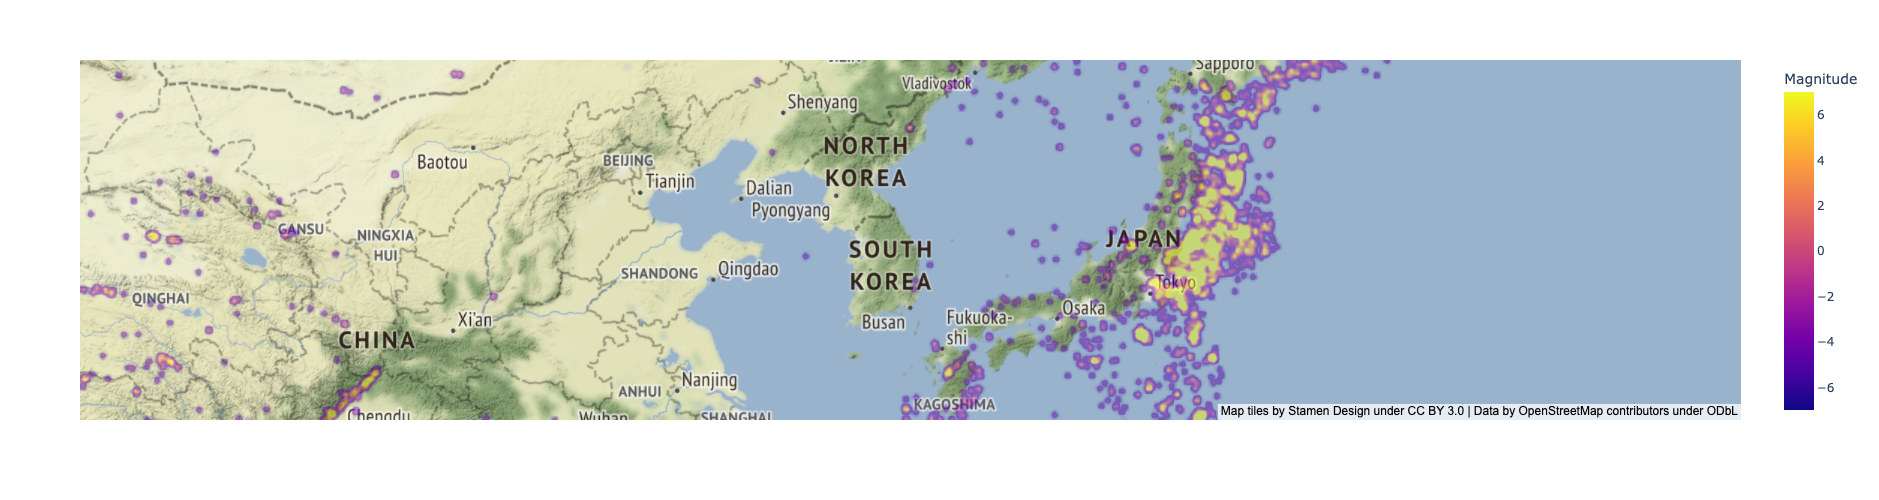

In [2]:
with open("Figs/GODE_earthquake.pkl", "rb") as file:
    loaded_object = pickle.load(file)

loaded_object